# Compute the density of waves over the entire DUNEX experiment

In [65]:
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import netCDF4 as nc
import numpy as np
from scipy import stats

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
mission_list = glob.glob('../microSWIFT_data/final_dataset/mission_*.nc')
bathy_file = '../microSWIFT_data/FRFdata/' \
             'FRF_geomorphology_DEMs_surveyDEM_20211021.nc'

In [67]:
wave_x_locs_all = []
wave_y_locs_all = []

for mission_nc in mission_list:
    mission_dataset = nc.Dataset(mission_nc, mode='r')

    x_locations = mission_dataset['xFRF'][:]
    y_locations = mission_dataset['yFRF'][:]
    eta = mission_dataset['sea_surface_elevation'][:]
    time = mission_dataset['time'][:]

    wave_heights, \
    wave_x_locs, \
    wave_y_locs = mission_tools.compute_individual_waves(x_locations,
                                                        y_locations,
                                                        eta, time,
                                                        bathy_file)

    indices = np.logical_not(np.logical_or(np.isnan(wave_x_locs),
                                            np.isnan(wave_y_locs)))     
    indices = np.array(indices)
    wave_x_locs = np.array(wave_x_locs)[indices]
    wave_y_locs = np.array(wave_y_locs)[indices]

    wave_x_locs_all.append(wave_x_locs)
    wave_y_locs_all.append(wave_y_locs)

wave_x_locs_all = np.concatenate(wave_x_locs_all).flatten()
wave_y_locs_all = np.concatenate(wave_y_locs_all).flatten()

print(f'Total Number of Waves Measured: {wave_x_locs_all.size}')

Total Number of Waves Measured: 116307


## Plot the density of all individual waves 

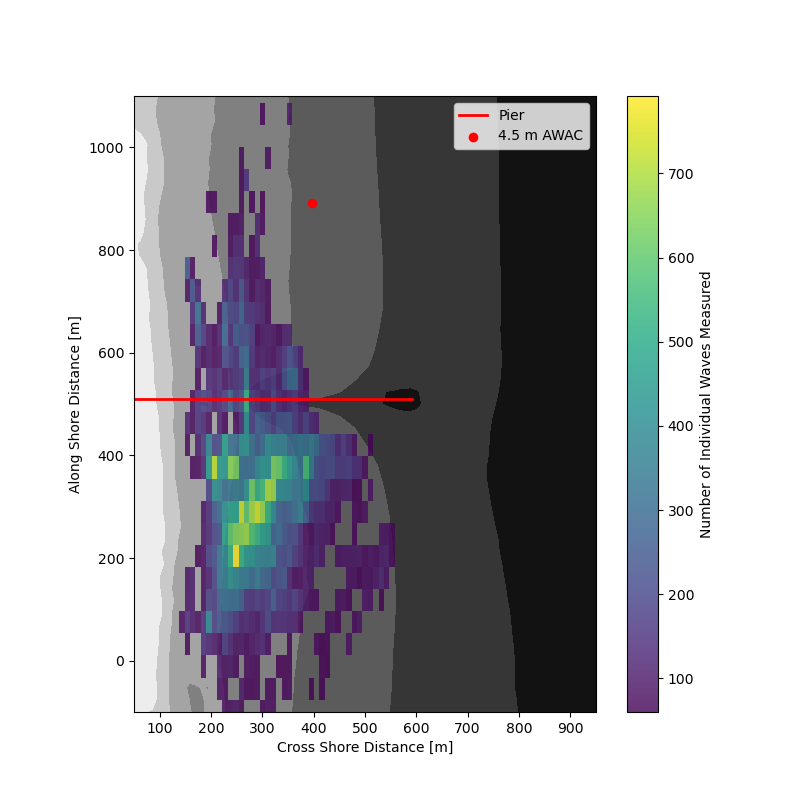

In [68]:
fig, ax = plt.subplots(figsize=(8,8))

bathy_dataset = nc.Dataset(bathy_file)
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],
                                    bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
ax.contourf(xFRF_grid, yFRF_grid, bathy, cmap='gray')
h, x_edge, y_edge, map = ax.hist2d(wave_x_locs_all,
                wave_y_locs_all,
                bins=50, cmap='viridis', alpha=0.8, cmin=60)
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Number of Individual Waves Measured')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier') # coordinates of pier
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations 
                                     # published on FRF data portal
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
           color='r', label='4.5 m AWAC')

ax.set_xlim([np.min(xFRF_grid), np.max(xFRF_grid)])
ax.set_ylim([np.min(yFRF_grid), np.max(yFRF_grid)])
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.set_aspect('equal')
ax.legend()

bathy_dataset.close()

In [69]:
print(np.diff(x_edge))
print(np.diff(y_edge))

[10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828 10.49114828
 10.49114828 10.49114828]
[43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284 43.08573284
 43.08573284 43.08573284 

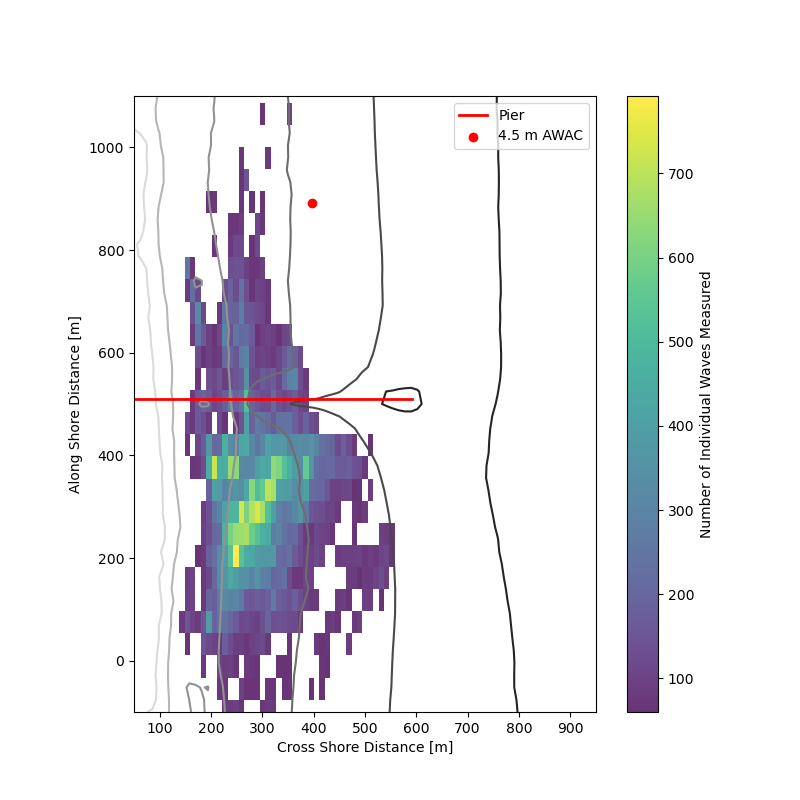

In [70]:
fig, ax = plt.subplots(figsize=(8,8))

bathy_dataset = nc.Dataset(bathy_file)
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],
                                    bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
ax.contour(xFRF_grid, yFRF_grid, bathy, cmap='gray')
h, x_edge, y_edge, map = ax.hist2d(wave_x_locs_all,
                wave_y_locs_all,
                bins=50, cmap='viridis', alpha=0.8, cmin=60)
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Number of Individual Waves Measured')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier') # coordinates of pier
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations 
                                     # published on FRF data portal
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
           color='r', label='4.5 m AWAC')

ax.set_xlim([np.min(xFRF_grid), np.max(xFRF_grid)])
ax.set_ylim([np.min(yFRF_grid), np.max(yFRF_grid)])
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.set_aspect('equal')
ax.legend()

bathy_dataset.close()

In [78]:
# Plot the GPS measurement density which which show where we have Level 1 data 
x_locs_all = []
y_locs_all = []

for mission_nc in mission_list:
    mission_dataset = nc.Dataset(mission_nc, mode='r')

    x_locations = np.ma.concatenate(mission_dataset['xFRF'][:]).flatten()
    y_locations = np.ma.concatenate(mission_dataset['yFRF'][:]).flatten()
    indices = np.logical_not(np.logical_or(np.isnan(x_locations),
                                            np.isnan(y_locations)))     
    indices = np.array(indices)
    x_locs_all.append(x_locations[indices])
    y_locs_all.append(y_locations[indices])
    mission_dataset.close()

x_locs_all = np.array(np.ma.concatenate(x_locs_all).flatten())
y_locs_all = np.array(np.ma.concatenate(y_locs_all).flatten())

print(f'Total measured points: {x_locs_all.size}')


Total measured points: 8563740


/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_14303/2500952726.py:23: RuntimeWarning: divide by zero encountered in log
  map = ax.pcolormesh(X, Y, np.log(h))


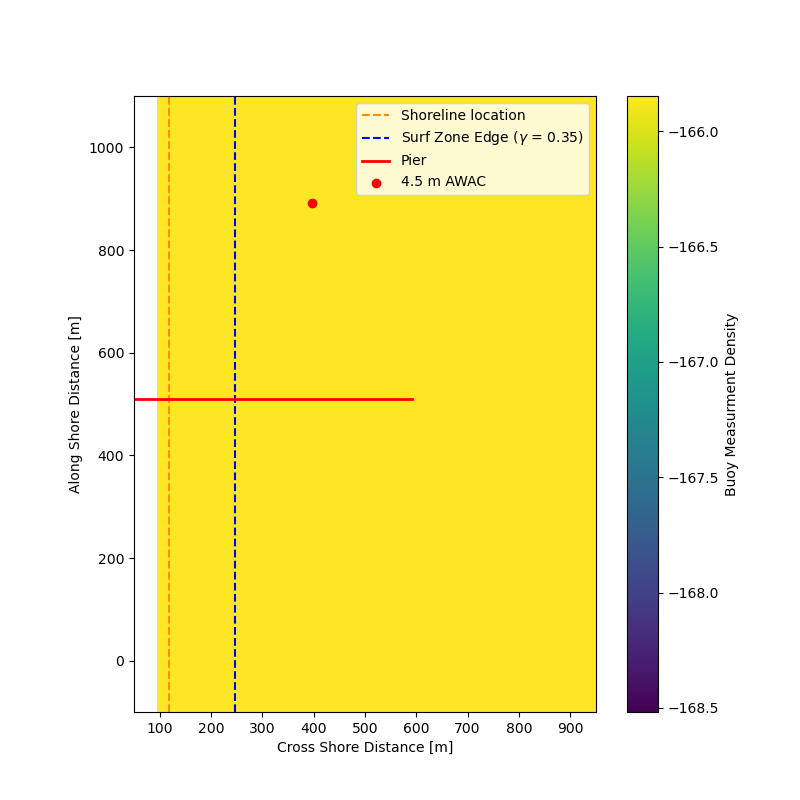

In [97]:
fig, ax = plt.subplots(figsize=(8,8))

bathy_dataset = nc.Dataset(bathy_file)
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],
                                    bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# get shoreline and average surfzone location
shoreline_location = np.interp(0, np.flip(np.nanmean(bathy, axis=0)), np.flip(bathy_dataset['xFRF'][:]))
gamma = 0.35
dataset_8marray = nc.Dataset('../microSWIFT_data/FRFdata/FRF-ocean_waves_8m-array_202110.nc')
hs_avg_8marray = np.mean(dataset_8marray['waveHs'][:])
break_depth = hs_avg_8marray / gamma
xs_gamma_location = np.interp(-break_depth, np.flip(np.nanmean(bathy, axis=0)), np.flip(bathy_dataset['xFRF'][:]))
ax.axvline(shoreline_location, label='Shoreline location', color='darkorange', linestyle='dashed')
ax.axvline(xs_gamma_location, label='Surf Zone Edge ($\gamma$ = 0.35)', color='b', linestyle='dashed')

# Plot microSWIFT measurement locations
# ax.contour(xFRF_grid, yFRF_grid, bathy, cmap='gray', label='Bathymetry Contours')
# ax.scatter(x_locs_all, y_locs_all, color='lightsteelblue', label='microSWIFT Measurements', s=1)
h, xedges, yedges = np.histogram2d(x_locs_all, y_locs_all, bins=(10, 10), density=True)
X, Y = np.meshgrid(xedges, yedges)
map = ax.pcolormesh(X, Y, np.log(h))
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Buoy Measurment Density')
ax.plot([50,591],[510,510], linewidth=2, color='r', label='Pier') # coordinates of pier
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations 
                                     # published on FRF data portal
ax.scatter(awac4p5m_location[0],awac4p5m_location[1],
           color='r', label='4.5 m AWAC')

ax.set_xlim([np.min(xFRF_grid), np.max(xFRF_grid)])
ax.set_ylim([np.min(yFRF_grid), np.max(yFRF_grid)])
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Along Shore Distance [m]')
ax.set_aspect('equal')
ax.legend()

bathy_dataset.close()

In [99]:
h.nonzero()

(array([0, 9]), array([0, 9]))